11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
844/844 [==============================] - 7s 8ms/step - loss: 0.2756 - accuracy: 0.9222 - val_loss: 0.1302 - val_accuracy: 0.9648
Epoch 2/5
844/844 [==============================] - 9s 10ms/step - loss: 0.1159 - accuracy: 0.9661 - val_loss: 0.0968 - val_accuracy: 0.9747
Epoch 3/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0765 - accuracy: 0.9777 - val_loss: 0.0837 - val_accuracy: 0.9770
Epoch 4/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0544 - accuracy: 0.9839 - val_loss: 0.0795 - val_accuracy: 0.9762
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9763
Vigilance Parameter: 0.4
Test Accuracy: 0.9763000011444092
313/313 [==============================] - 1s 2ms/step


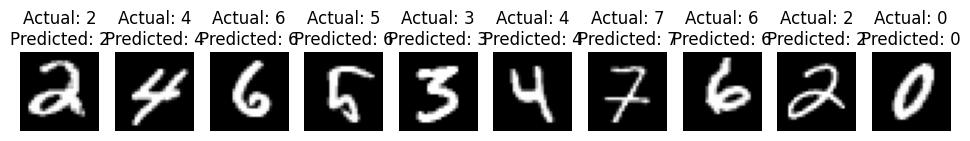

Epoch 1/5
844/844 [==============================] - 5s 5ms/step - loss: 0.2736 - accuracy: 0.9221 - val_loss: 0.1247 - val_accuracy: 0.9628
Epoch 2/5
844/844 [==============================] - 4s 5ms/step - loss: 0.1178 - accuracy: 0.9658 - val_loss: 0.0919 - val_accuracy: 0.9753
Epoch 3/5
844/844 [==============================] - 5s 6ms/step - loss: 0.0775 - accuracy: 0.9770 - val_loss: 0.0826 - val_accuracy: 0.9762
Epoch 4/5
844/844 [==============================] - 5s 6ms/step - loss: 0.0558 - accuracy: 0.9829 - val_loss: 0.0722 - val_accuracy: 0.9793
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9768
Vigilance Parameter: 0.6
Test Accuracy: 0.9768000245094299
313/313 [==============================] - 1s 2ms/step


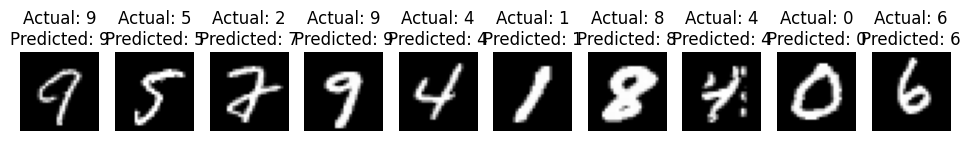

Epoch 1/5
844/844 [==============================] - 5s 5ms/step - loss: 0.2722 - accuracy: 0.9227 - val_loss: 0.1230 - val_accuracy: 0.9663
Epoch 2/5
844/844 [==============================] - 6s 7ms/step - loss: 0.1154 - accuracy: 0.9656 - val_loss: 0.0946 - val_accuracy: 0.9728
Epoch 3/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0766 - accuracy: 0.9779 - val_loss: 0.0779 - val_accuracy: 0.9777
Epoch 4/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0539 - accuracy: 0.9838 - val_loss: 0.0810 - val_accuracy: 0.9760
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9789
Vigilance Parameter: 0.8
Test Accuracy: 0.9789000153541565
313/313 [==============================] - 1s 2ms/step


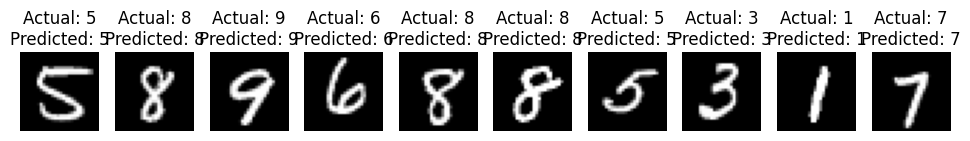

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the ART neural network
class ARTNetwork(models.Model):
    def __init__(self, vigilance_parameter):
        super(ARTNetwork, self).__init__()
        self.vigilance_parameter = vigilance_parameter
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(256, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.fc1(x)
        return self.fc2(x)

# Function to train the ART network
def train_ART_network(vigilance_parameter):
    art_model = ARTNetwork(vigilance_parameter)
    art_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    art_model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)
    return art_model

# Function to evaluate the ART network and visualize results
def evaluate_ART_network(model, vigilance_parameter):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Vigilance Parameter: {vigilance_parameter}")
    print(f"Test Accuracy: {test_acc}")

    # Visualize samples
    predictions = model.predict(test_images)
    num_samples = 10
    selected_samples = np.random.choice(len(test_images), num_samples, replace=False)

    plt.figure(figsize=(12, 5))
    for i, sample_index in enumerate(selected_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(test_images[sample_index].reshape(28, 28), cmap='gray')
        plt.title(f"Actual: {test_labels[sample_index]}\nPredicted: {np.argmax(predictions[sample_index])}")
        plt.axis('off')
    plt.show()

# Experiment with different vigilance parameters
vigilance_parameters = [0.4, 0.6, 0.8]
for vigilance_parameter in vigilance_parameters:
    model = train_ART_network(vigilance_parameter)
    evaluate_ART_network(model, vigilance_parameter)
